In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


In [2]:
#dane = pd.merge(df1_pr, df2_pr, on='EmployeeNumber', how='inner')
dane = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
dane

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
dane_copy=dane

In [4]:
dane_copy = dane_copy.drop(['Over18','EmployeeCount', 'StandardHours'], axis=1)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>],
       [<Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>],
       [<Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>],
       [<Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>],
       [<Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axes: title={'center': 'TotalWorkingYears'}>],
       [<Axes: title={'center': 'TrainingTimesLastYear'}

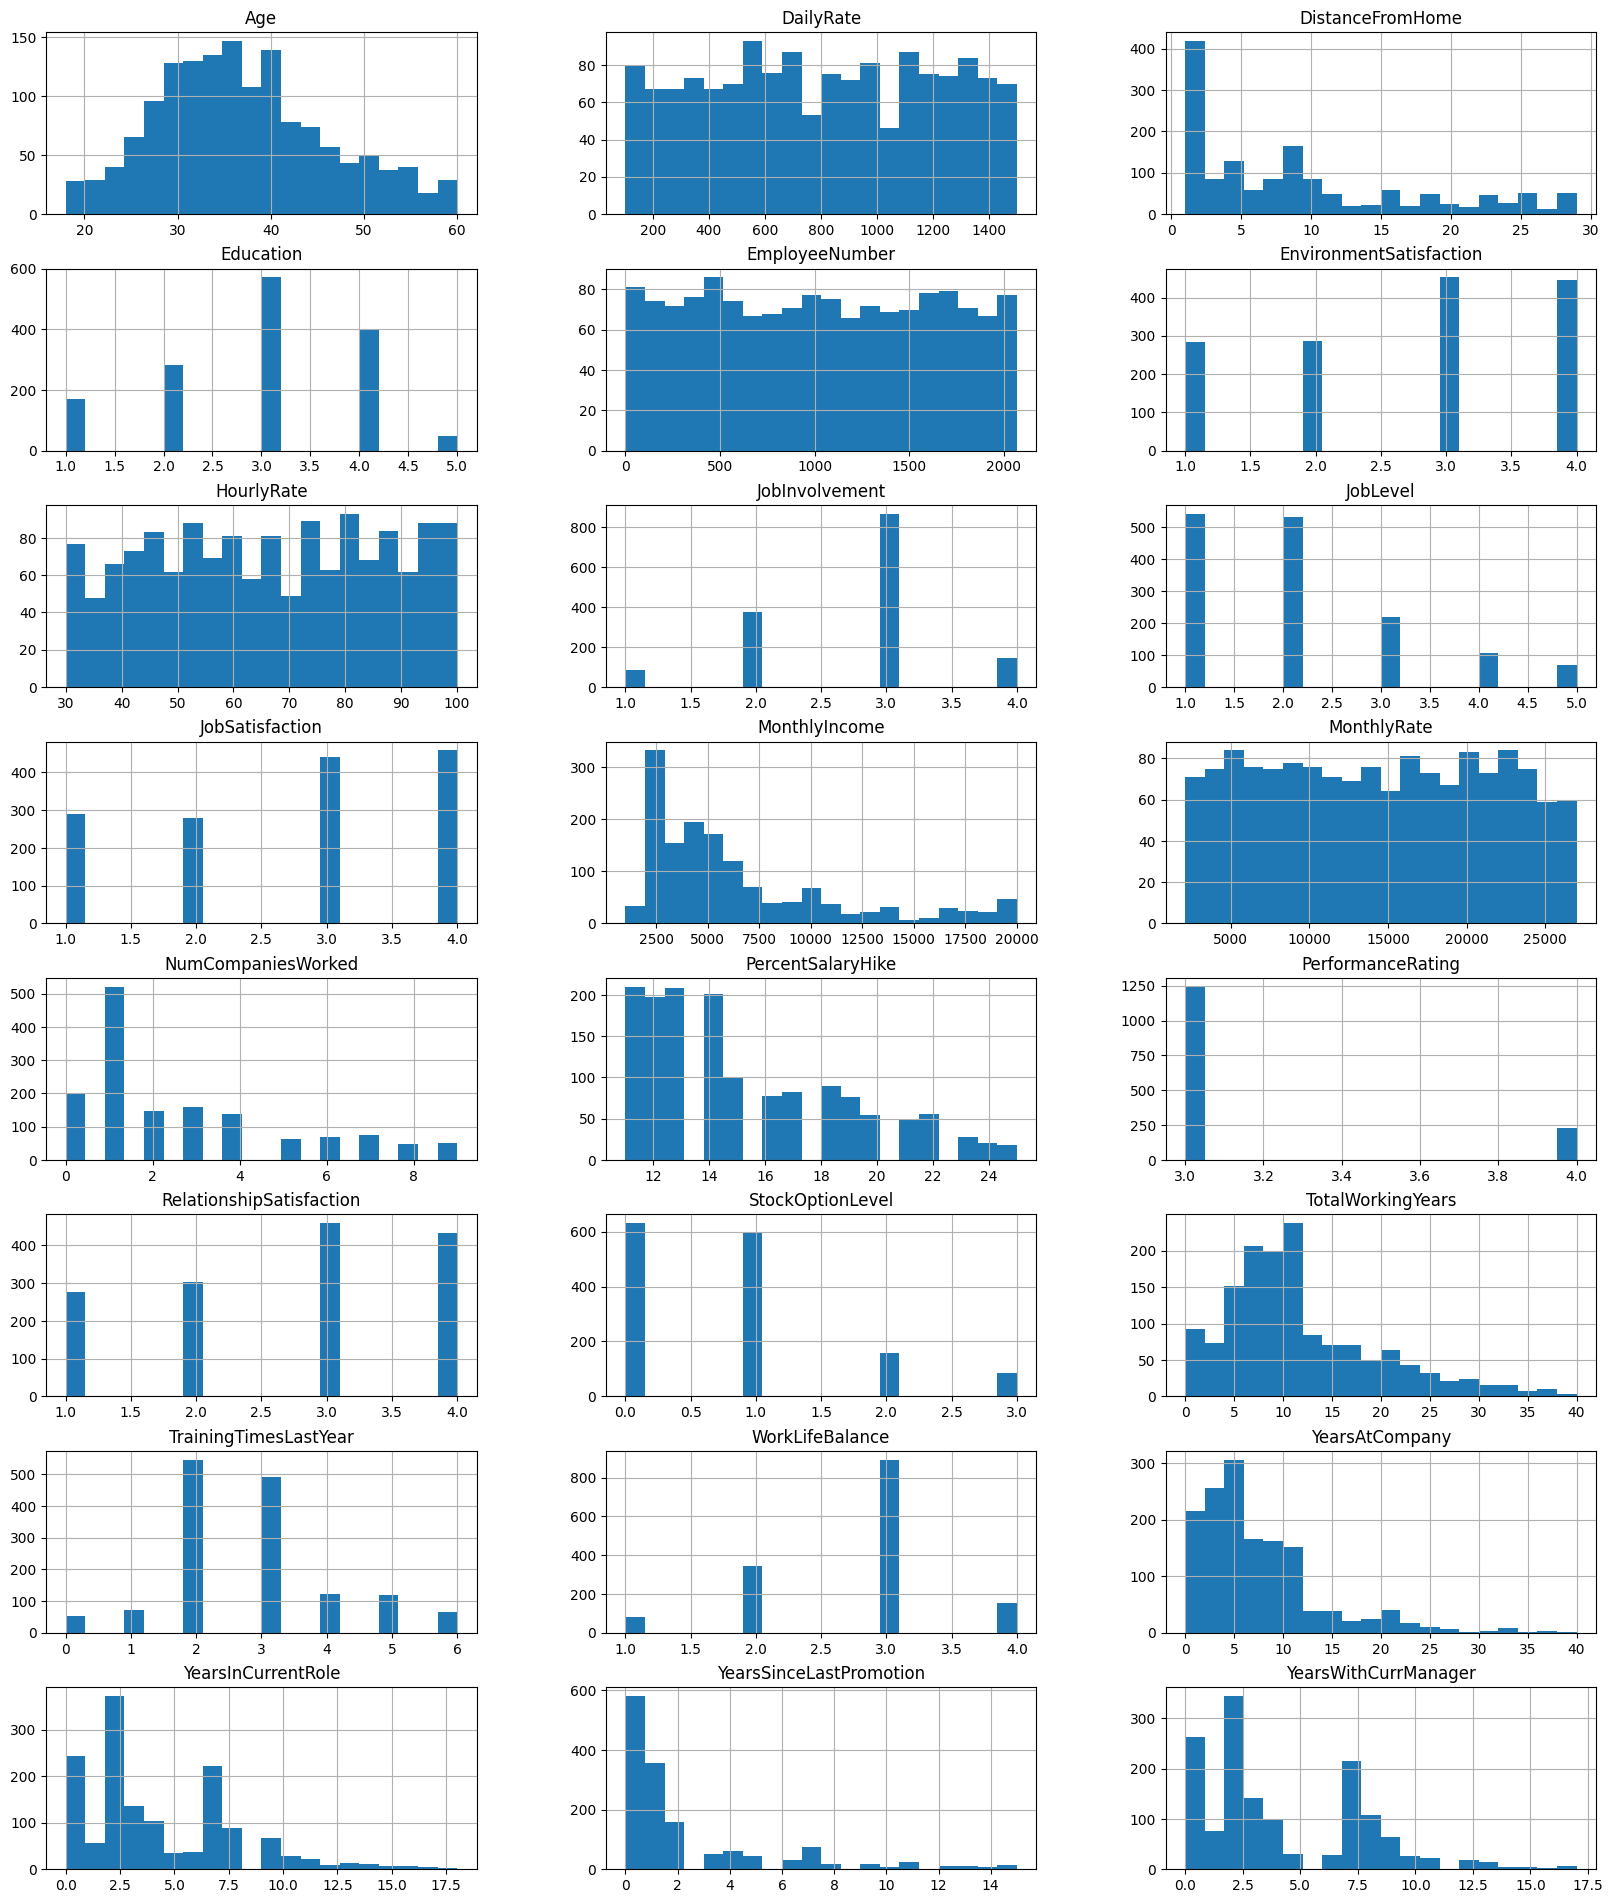

In [5]:
dane_copy.hist(bins=20,layout=(10,3),figsize=(20,30))

In [6]:
dane_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.00,3.0,4.00,4.0


In [7]:
dane_copy["Attrition"].isna().sum()

np.int64(0)

In [8]:
dane_copy = dane_copy.dropna(subset=["Attrition"])

In [9]:
np.sort(dane_copy['Age'].unique())

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60])

In [10]:
dane_copy = dane_copy[dane_copy['Age']<=60]

In [11]:
unique_distances = sorted(dane_copy['DistanceFromHome'].unique())
print(unique_distances)

[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29)]


In [12]:
dane_copy = dane_copy[dane_copy['DistanceFromHome']<=30]

In [13]:
unique_years_manager = sorted(dane_copy['YearsWithCurrManager'].unique())
print(unique_years_manager)

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17)]


In [14]:
dane_copy = dane_copy[dane_copy['YearsWithCurrManager']<=20]

In [15]:
unique_total_years = sorted(dane_copy['TotalWorkingYears'].unique())
formatted_total_years = [f"{int(years):.0f}" for years in unique_total_years]
print(formatted_total_years)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '40']


In [16]:
dane_copy = dane_copy[dane_copy["TotalWorkingYears"]<=40]

In [17]:
unique_years_company = sorted(dane_copy['YearsAtCompany'].unique())
formatted_years_company= [f"{years:.0f}" for years in unique_years_company]
print(formatted_years_company)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '29', '30', '31', '32', '33', '34', '36', '37', '40']


In [18]:
dane_copy = dane_copy[dane_copy["YearsAtCompany"]<=40]

In [19]:
unique_years_role = sorted(dane_copy['YearsInCurrentRole'].unique())
formatted_years_role= [f"{years:.0f}" for years in unique_years_role]
print(formatted_years_role)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18']


In [20]:
dane_copy = dane_copy[dane_copy["YearsInCurrentRole"]<=20]

In [21]:
unique_years_promotion = sorted(dane_copy['YearsSinceLastPromotion'].unique())
formatted_years_promotion= [f"{years:.0f}" for years in unique_years_promotion]
print(formatted_years_promotion)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']


In [22]:
dane_copy = dane_copy[dane_copy["YearsSinceLastPromotion"]<=15]

In [23]:
dane_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.00,3.0,4.00,4.0


In [24]:
duplicates = dane_copy[dane_copy.duplicated(subset=[col for col in dane_copy.columns if col != 'EmployeeNumber' and col != 'Attrition'])]
duplicates

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [25]:
dane_copy = dane_copy.drop_duplicates(subset=[col for col in dane_copy.columns if col != 'EmployeeNumber' and col != 'Attrition'], keep="first")

In [26]:
dane_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.00,3.0,4.00,4.0


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>],
       [<Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>],
       [<Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>],
       [<Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>],
       [<Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axes: title={'center': 'TotalWorkingYears'}>],
       [<Axes: title={'center': 'TrainingTimesLastYear'}

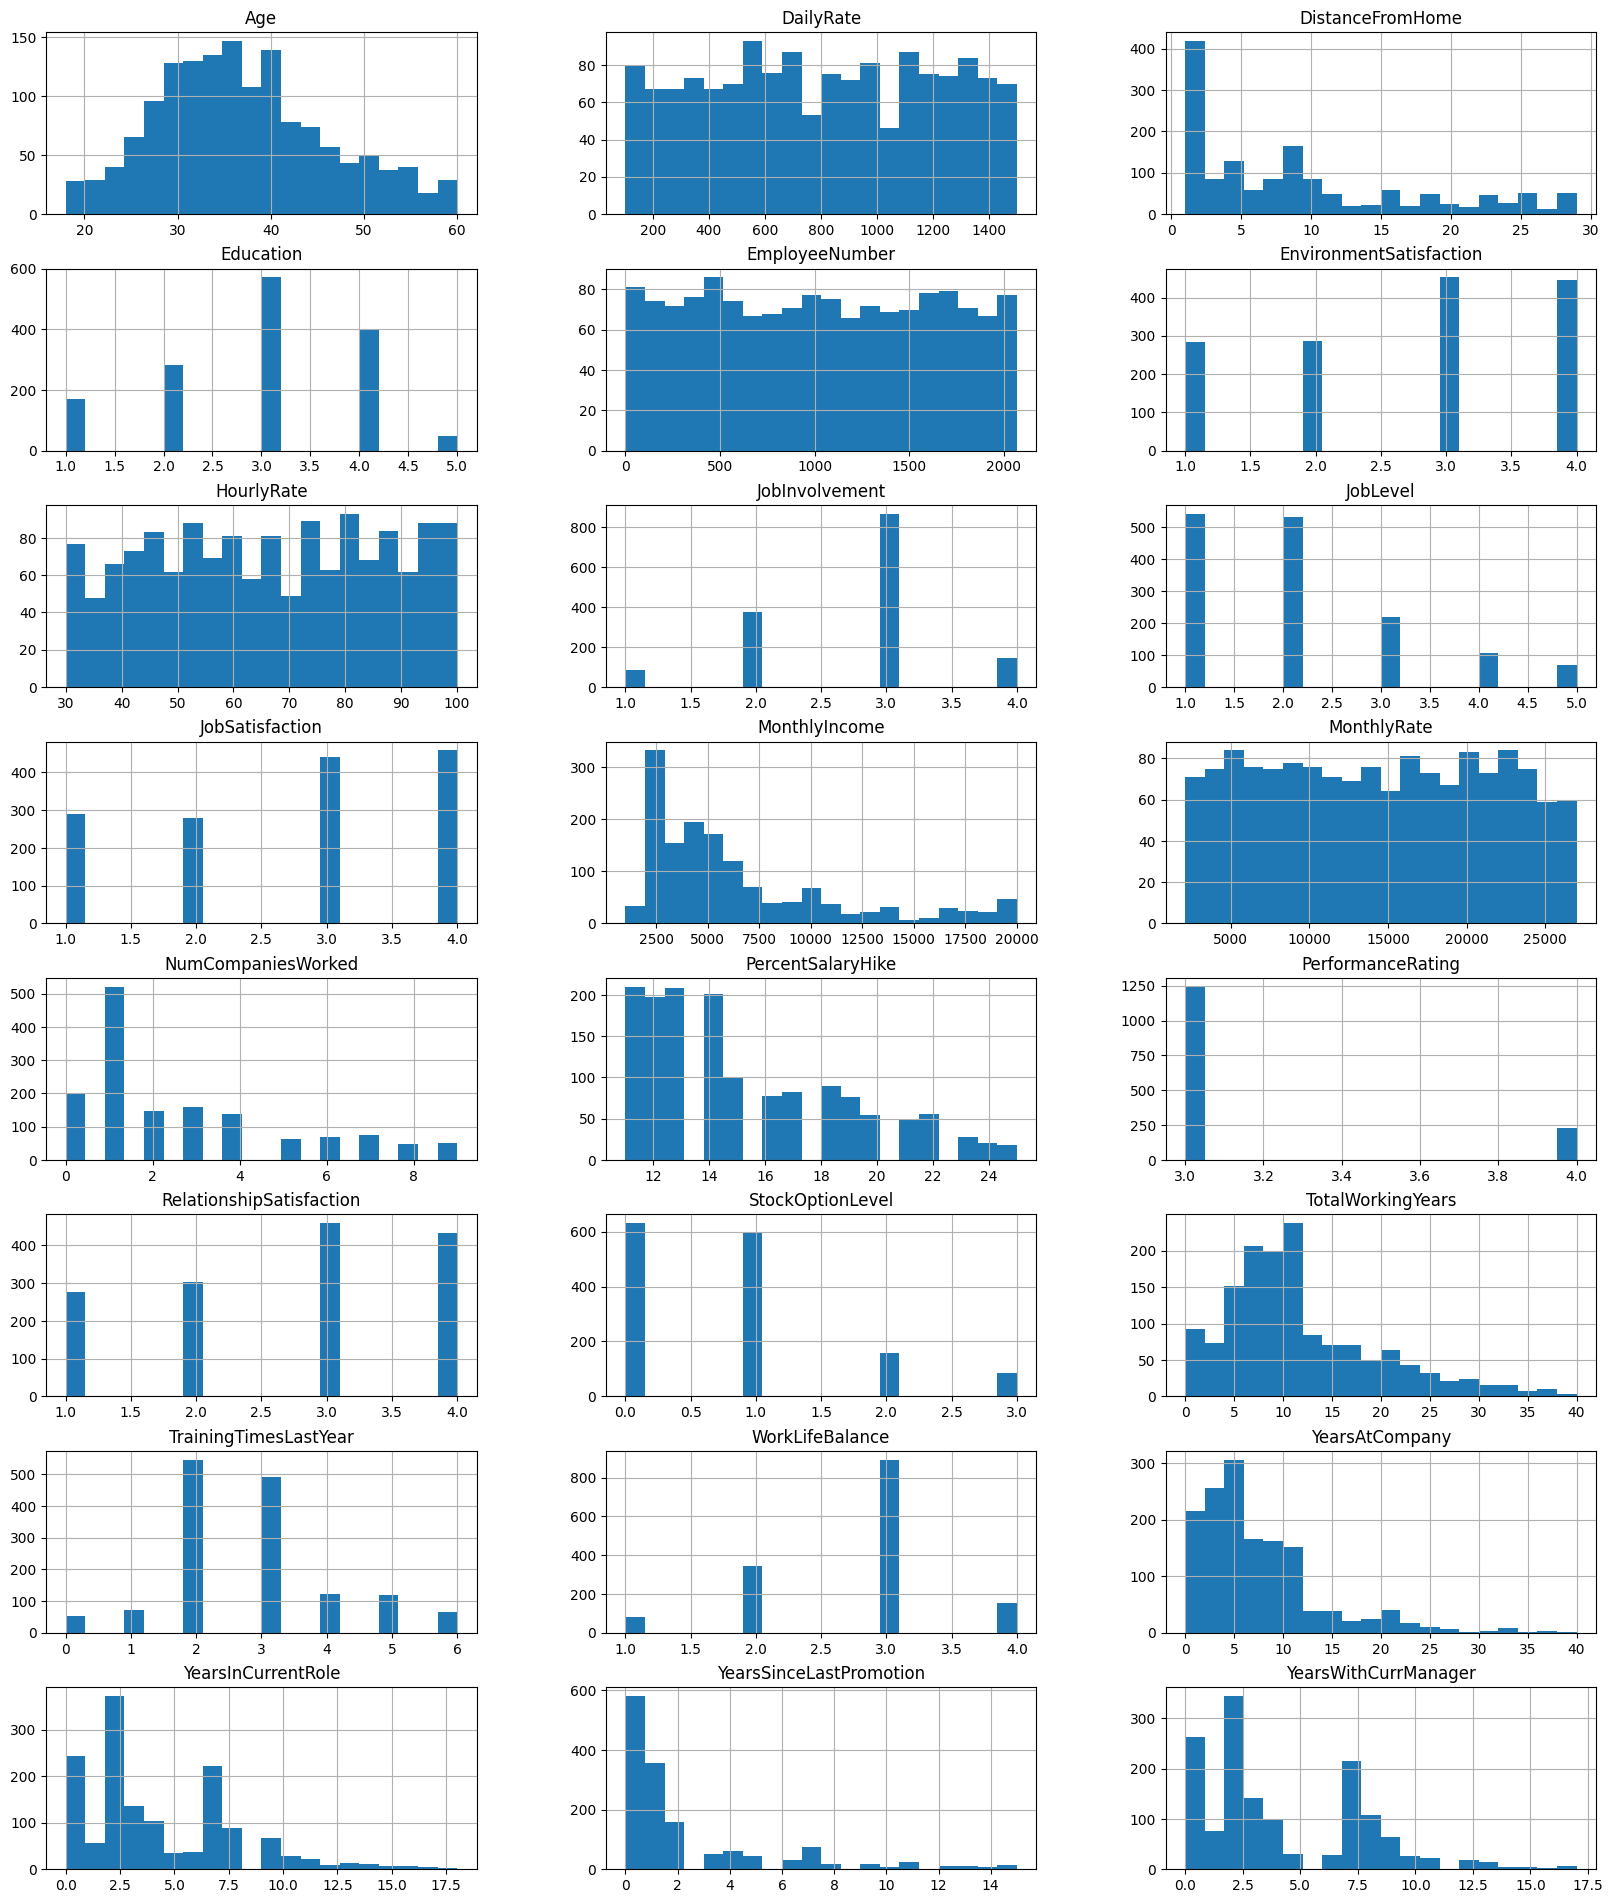

In [27]:
dane_copy.hist(bins=20,layout=(10,3),figsize=(20,30))

In [28]:
dane_copy = pd.get_dummies(dane_copy,columns=['BusinessTravel','EducationField','JobRole','MaritalStatus'],dtype=int)

In [29]:
dane_copy['AgeGroup'] = dane_copy['Age'].apply(lambda x: x//10)

In [30]:
dane_copy['Gender'] = dane_copy['Gender'].map({'Male': 1, 'Female':0})

In [31]:
dane_copy['OverTime'] = dane_copy['OverTime'].map({'Yes': 1, 'No':0})

In [32]:
dane_copy['Attrition'] = dane_copy['Attrition'].map({'Yes': 1, 'No':0})

In [33]:
dane_copy = dane_copy.drop('Department', axis=1)

In [34]:
dane_copy.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,AgeGroup
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1024.865306,2.721769,0.600000,65.891156,2.729932,...,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,0.222449,0.457823,0.319728,3.242857
std,9.135373,0.367863,403.509100,8.106864,1.024165,602.024335,1.093082,0.490065,20.329428,0.711561,...,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891,0.416033,0.498387,0.466530,0.960875
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,1.000000,0.000000,30.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,491.250000,2.000000,0.000000,48.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,1.000000,66.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,1.000000,83.750000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,1.000000,100.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


In [35]:
dane_copy.drop(columns=['EmployeeNumber'], inplace=True)

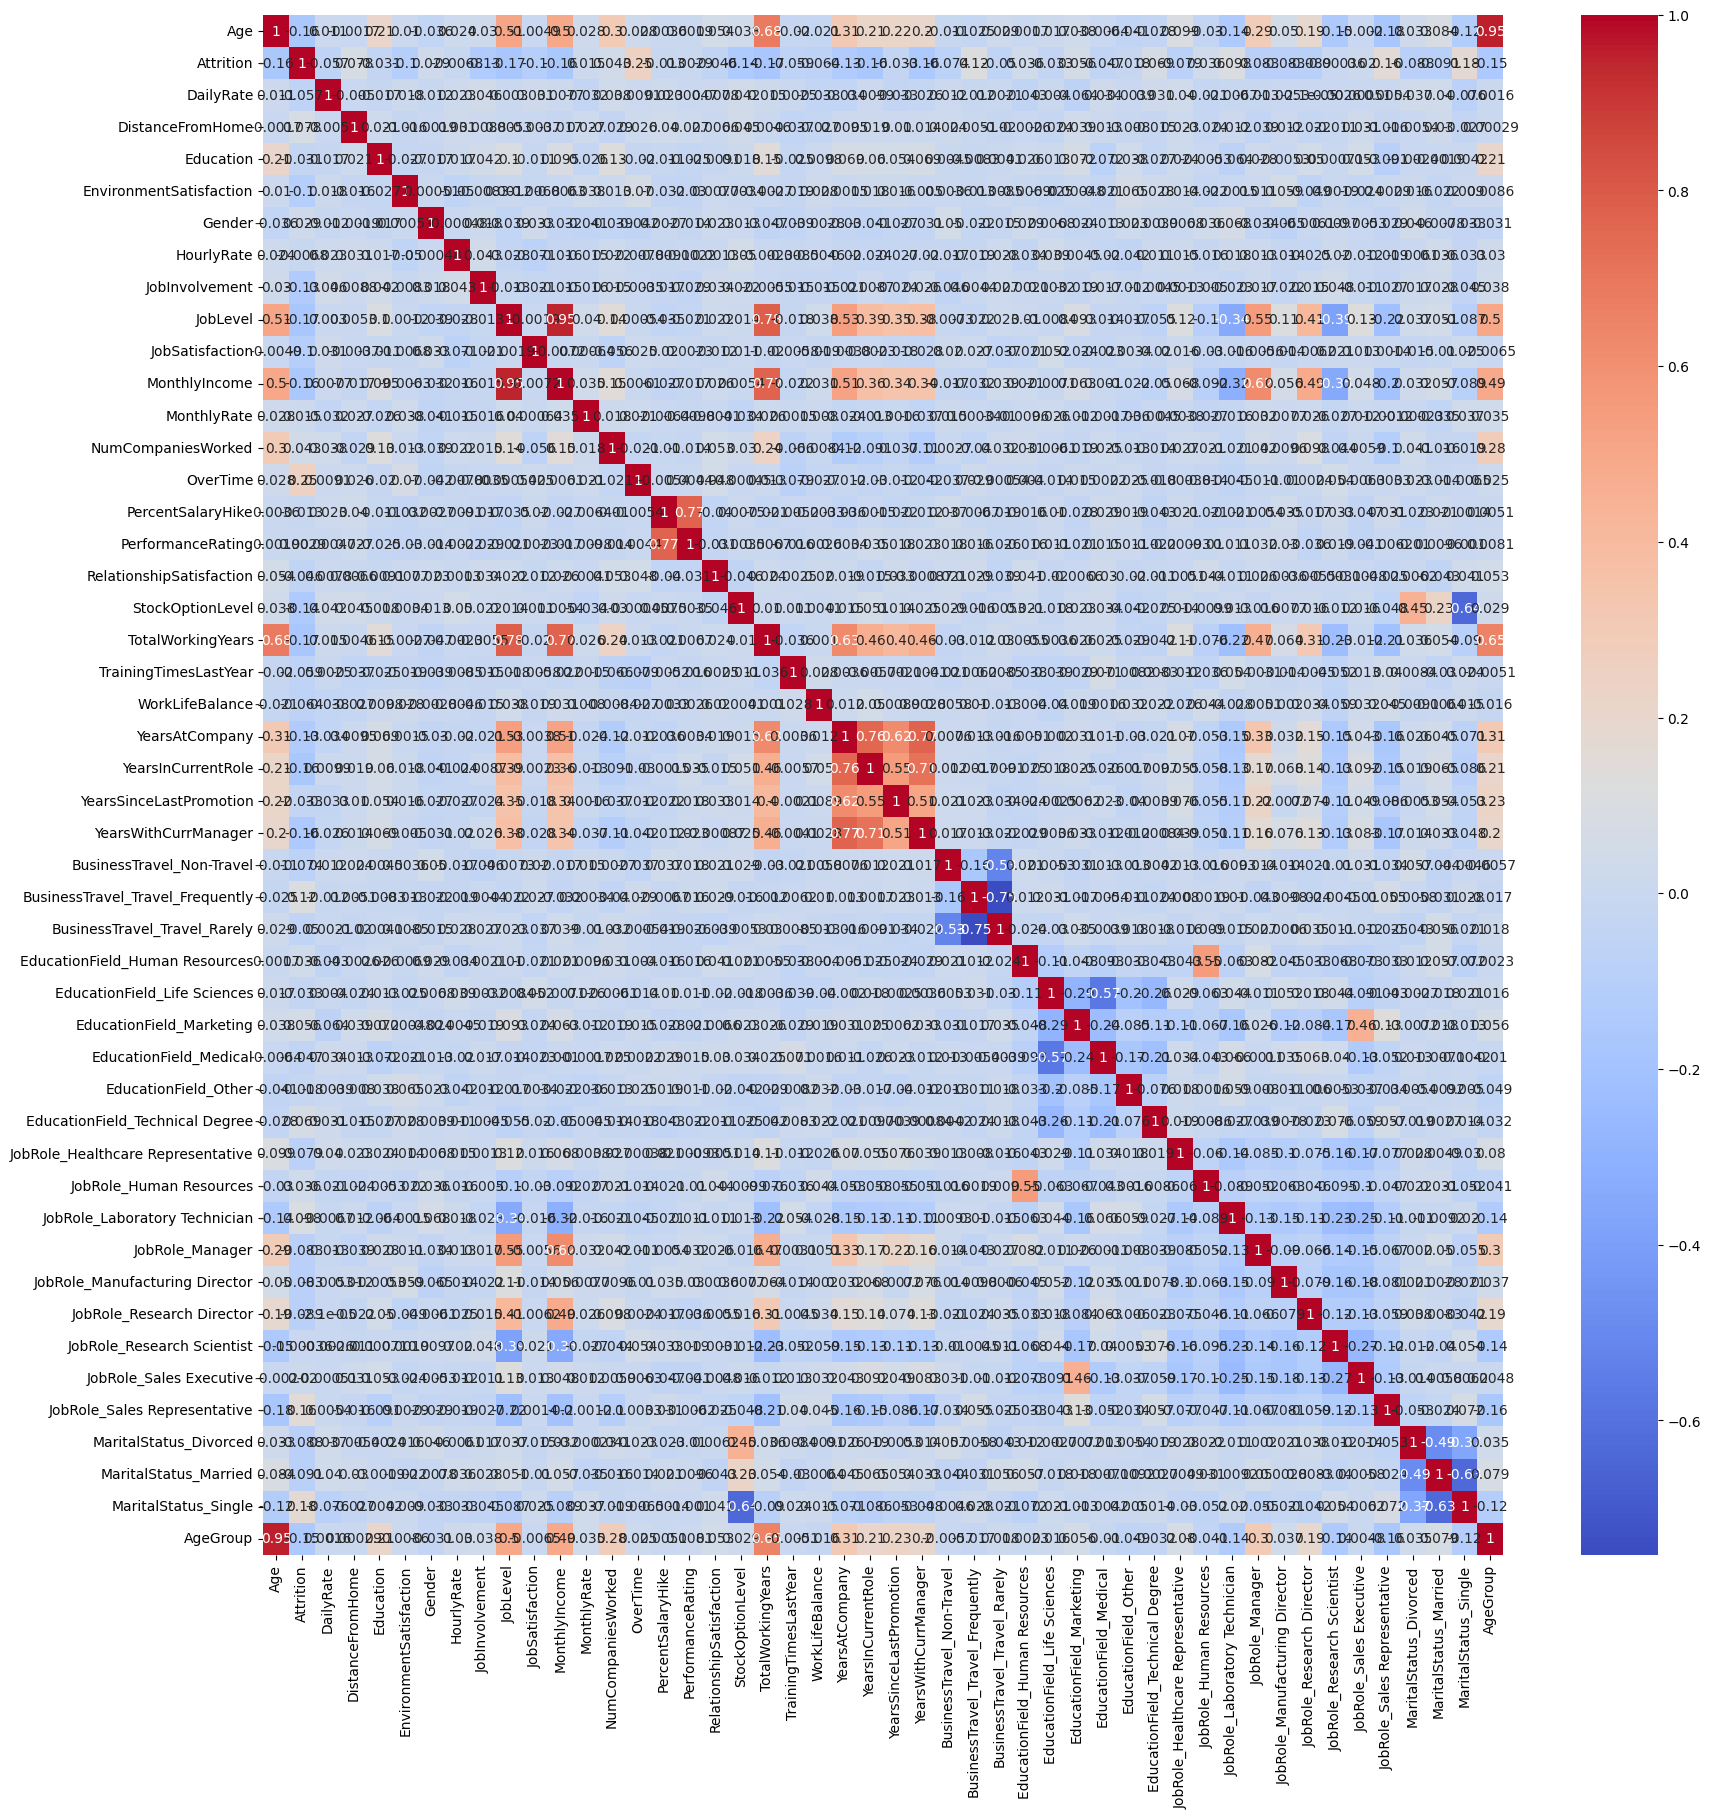

In [36]:
#check for correlation between variables
correlation = dane_copy.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()


In [37]:
correlation_matrix = dane_copy.corr().abs()

correlation = correlation_matrix.stack().reset_index()
correlation.columns = ['Variable1', 'Variable2', 'Correlation']

correlation = correlation[correlation['Variable1'] != correlation['Variable2']]
correlation = correlation[correlation['Variable1'] != 'Attrition']
correlation = correlation[correlation['Variable2'] != 'Attrition']

correlation = correlation.sort_values(by='Correlation', ascending=False)
correlation.head(30)

,Variable1,Variable2,Correlation
2256,AgeGroup,Age,0.953577
47,Age,AgeGroup,0.953577
537,MonthlyIncome,JobLevel,0.950300
443,JobLevel,MonthlyIncome,0.950300
451,JobLevel,TotalWorkingYears,0.782208
921,TotalWorkingYears,JobLevel,0.782208
783,PerformanceRating,PercentSalaryHike,0.773550
736,PercentSalaryHike,PerformanceRating,0.773550
923,TotalWorkingYears,MonthlyIncome,0.772893
547,MonthlyIncome,TotalWorkingYears,0.772893


In [38]:
#Dropping the columns with the biggest correlation
dane_copy = dane_copy.drop(columns=['Age','MonthlyIncome','TotalWorkingYears','PercentSalaryHike','YearsInCurrentRole','YearsWithCurrManager'])

In [39]:
X,y = dane_copy.drop(['Attrition'],axis=1), dane_copy['Attrition']
y = y.astype(int)

In [40]:
class ClassificationPipeline:
    def __init__(self, model, n_splits=5):
        self.model = model
        self.n_splits = n_splits
        self.pipeline = Pipeline([
            ('scaler', StandardScaler()),      # Standardization
            ('smote', SMOTE(random_state=42)), # Oversampling only on training data
            ('model', self.model)              # ML Model
        ])
        self.skf = StratifiedKFold(n_splits=self.n_splits, shuffle=True, random_state=42)

    def fit(self, X, y):
        """Train model with cross-validation and return predictions."""
        self.y_pred = cross_val_predict(self.pipeline, X, y, cv=self.skf)
        self.y_true = y  # Store true labels

    def evaluate(self):
        """Evaluate model performance using classification metrics."""
        print("Classification Report:\n", classification_report(self.y_true, self.y_pred))
        print("Confusion Matrix:")
        
        cm = confusion_matrix(self.y_true, self.y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()

        
        if len(set(self.y_true)) == 2:
            roc_auc = roc_auc_score(self.y_true, self.y_pred)
            print(f"ROC-AUC Score: {roc_auc:.4f}")



Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90      1233
           1       0.50      0.47      0.48       237

    accuracy                           0.84      1470
   macro avg       0.70      0.69      0.69      1470
weighted avg       0.83      0.84      0.84      1470

Confusion Matrix:


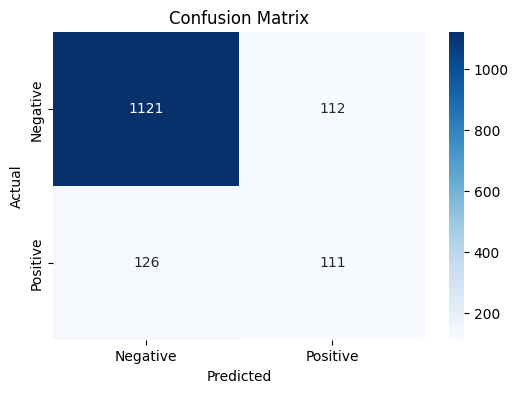

ROC-AUC Score: 0.6888


In [41]:
model = RandomForestClassifier(random_state=42, max_depth=4, min_samples_leaf=1)
pipeline = ClassificationPipeline(model)
pipeline.fit(X, y)
pipeline.evaluate()

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1233
           1       0.61      0.29      0.39       237

    accuracy                           0.86      1470
   macro avg       0.74      0.63      0.66      1470
weighted avg       0.83      0.86      0.83      1470

Confusion Matrix:


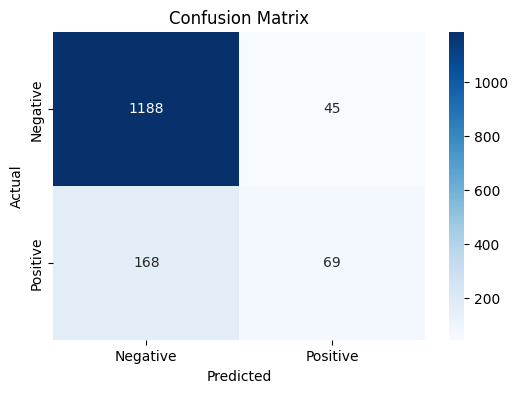

ROC-AUC Score: 0.6273


In [44]:
model = GradientBoostingClassifier(n_estimators=400, max_depth=9, learning_rate=0.2, random_state=42)
pipeline = ClassificationPipeline(model)
pipeline.fit(X, y)
pipeline.evaluate()

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1233
           1       0.61      0.35      0.45       237

    accuracy                           0.86      1470
   macro avg       0.75      0.65      0.68      1470
weighted avg       0.84      0.86      0.84      1470

Confusion Matrix:


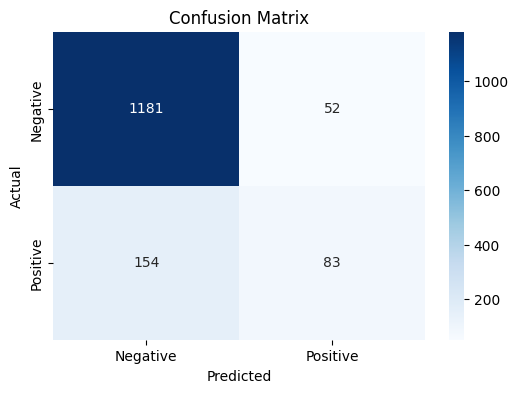

ROC-AUC Score: 0.6540


In [45]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=400, max_depth=9, learning_rate=0.2, random_state=42)
pipeline = ClassificationPipeline(model)
pipeline.fit(X, y)
pipeline.evaluate()

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      1233
           1       0.37      0.03      0.05       237

    accuracy                           0.84      1470
   macro avg       0.60      0.51      0.48      1470
weighted avg       0.77      0.84      0.77      1470

Confusion Matrix:


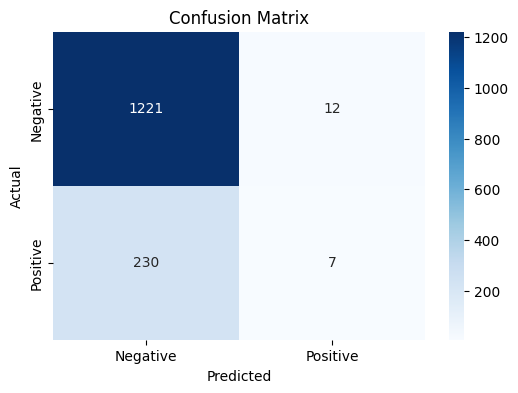

ROC-AUC Score: 0.5099


In [46]:
model = SVC(kernel='rbf', C=1, gamma=0.1, random_state=42)
pipeline = ClassificationPipeline(model)
pipeline.fit(X, y)
pipeline.evaluate()

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.67      0.77      1233
           1       0.26      0.59      0.36       237

    accuracy                           0.66      1470
   macro avg       0.58      0.63      0.56      1470
weighted avg       0.79      0.66      0.70      1470

Confusion Matrix:


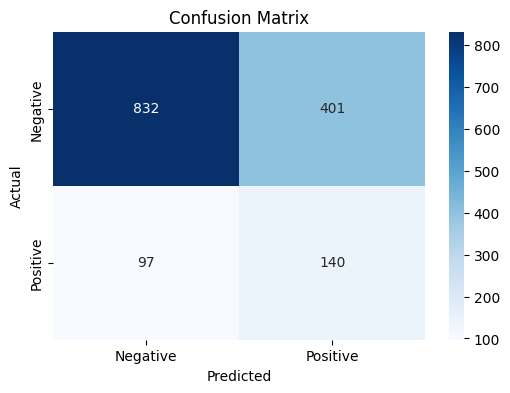

ROC-AUC Score: 0.6327


In [47]:
model = KNeighborsClassifier(n_neighbors=5)
pipeline = ClassificationPipeline(model)
pipeline.fit(X, y)
pipeline.evaluate()

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.77      0.84      1233
           1       0.37      0.71      0.49       237

    accuracy                           0.76      1470
   macro avg       0.65      0.74      0.66      1470
weighted avg       0.84      0.76      0.78      1470

Confusion Matrix:


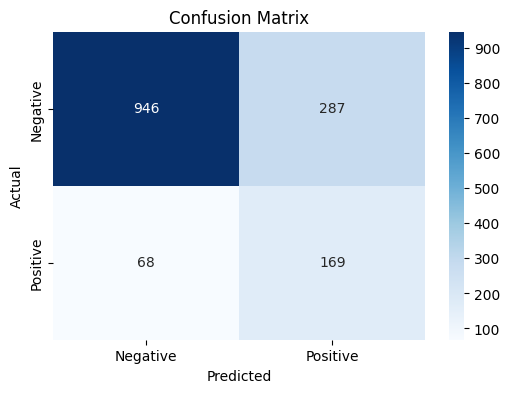

ROC-AUC Score: 0.7402


In [50]:
model = LogisticRegression(max_iter=10000,random_state=42)
pipeline = ClassificationPipeline(model)
pipeline.fit(X, y)
pipeline.evaluate()

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.81      0.86      1233
           1       0.36      0.54      0.43       237

    accuracy                           0.77      1470
   macro avg       0.63      0.68      0.64      1470
weighted avg       0.81      0.77      0.79      1470

Confusion Matrix:


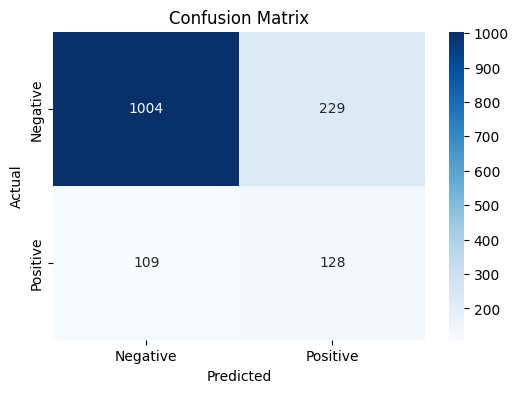

ROC-AUC Score: 0.6772


In [51]:
model = DecisionTreeClassifier(random_state=42, max_depth=4, min_samples_leaf=1)
pipeline = ClassificationPipeline(model)
pipeline.fit(X, y)
pipeline.evaluate()